In [10]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm 

# 특정 폴더 경로 설정
root_folder = '/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/'

# 모든 wav 파일 경로를 저장할 리스트
wav_files = []

# 폴더를 순회하며 모든 wav 파일 경로를 리스트에 추가
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith('.wav'):
            wav_files.append(os.path.join(subdir, file))

In [11]:
# 파일 수 및 기본 정보 확인
print(f"Total number of WAV files: {len(wav_files)}")

Total number of WAV files: 734329


In [12]:
# 파일 길이 및 기본 통계 수집
lengths = []
sample_rates = []

# tqdm을 사용하여 진행 상황을 시각화
for wav_file in tqdm(wav_files, desc="Processing WAV files"):
    y, sr = librosa.load(wav_file, sr=None)
    lengths.append(librosa.get_duration(y=y, sr=sr))
    sample_rates.append(sr)

Processing WAV files: 100%|██████████| 734329/734329 [04:46<00:00, 2562.80it/s]


In [13]:
# 데이터프레임으로 변환
df = pd.DataFrame({
    'file_path': wav_files,
    'length': lengths,
    'sample_rate': sample_rates
})

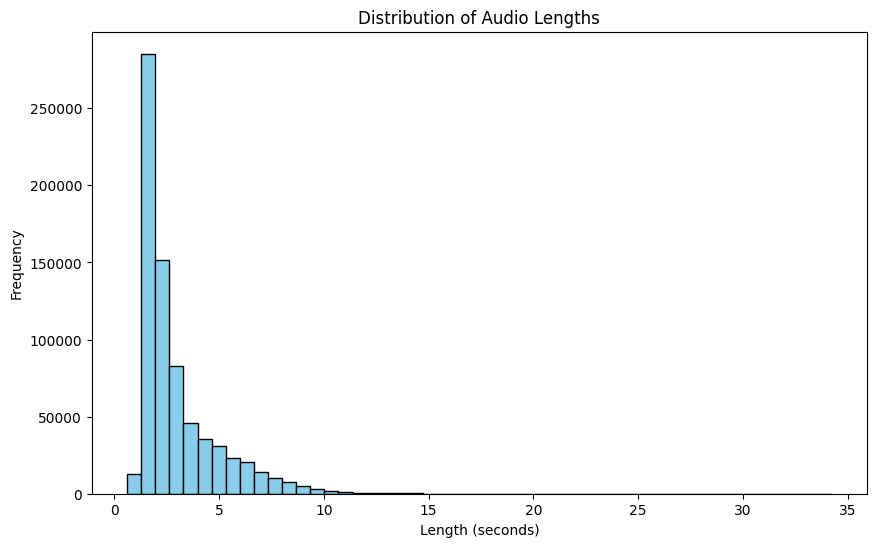

In [14]:
# 파일 길이 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Audio Lengths')
plt.xlabel('Length (seconds)')
plt.ylabel('Frequency')
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734329 entries, 0 to 734328
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   file_path    734329 non-null  object 
 1   length       734329 non-null  float64
 2   sample_rate  734329 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 16.8+ MB


In [18]:
df['length'].describe()

count    734329.000000
mean          2.970146
std           1.915866
min           0.616000
25%           1.660000
50%           2.280000
75%           3.530000
max          34.230000
Name: length, dtype: float64

In [21]:
df['sample_rate'].value_counts()

16000    734329
Name: sample_rate, dtype: int64

In [9]:
import os
train_data_path = '/workspace/ssd/AI_hub/speech_recognition/dataset/1.Training/source_data/'
valida_data_path = '/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/'


In [10]:
# 데이터 디렉토리 내의 모든 wav 파일 경로 저장
wav_files = []
for root, dirs, files in os.walk(valida_data_path):
    for file in files:
        if file.endswith(".wav"):
            wav_files.append(os.path.join(root, file))
print(len(wav_files))

734329


In [59]:
speaker_files = {}
for file in wav_files:
    speaker_dir = os.path.dirname(file)
    if speaker_dir not in speaker_files:
        speaker_files[speaker_dir] = []
    speaker_files[speaker_dir].append(file)

In [23]:
len(speaker_files)

1101

In [60]:
anchor_file = wav_files[2]

In [49]:
speaker_dir = os.path.dirname(anchor_file)
speaker_dir

'/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/VS_call_01/call/2021-12-13/0081'

In [19]:
positive_files = [f for f in wav_files if f.startswith(speaker_dir) and f != anchor_file]
len(positive_files)
positive_files[0]

'/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/VS_call_01/call/2021-12-13/0081/A0144-0081F1112-10510110-00099381.wav'

In [52]:
anchor_file, speaker_dir

('/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/VS_call_01/call/2021-12-13/0081/A0144-0081F1112-10510110-00099381.wav',
 '/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/VS_call_01/call/2021-12-13/0081')

In [53]:
sorted(speaker_files[speaker_dir])

TypeError: list indices must be integers or slices, not str

In [61]:
speaker_dir = os.path.dirname(anchor_file)
speaker_files = sorted(speaker_files[speaker_dir])
anchor_idx = speaker_files.index(anchor_file)
positive_idx = (anchor_idx + 1) % len(speaker_files)
positive_file = speaker_files[positive_idx]



In [44]:
anchor_file,positive_file

('/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/VS_call_01/call/2021-12-13/0081/A0144-0081F1112-10510110-00099381.wav',
 '/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/VS_call_01/call/2021-12-13/0081/A0083-0081F1112-10510130-03797608.wav')

In [56]:
anchor_file,positive_file

('/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/VS_call_01/call/2021-12-13/0081/A0144-0081F1112-10510110-00099381.wav',
 '/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/VS_call_01/call/2021-12-13/0081/A0144-0081F1112-10510110-00099430.wav')

In [62]:
anchor_file,positive_file

('/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/VS_call_01/call/2021-12-13/0081/A0012-0081F1112-10510100-00036576.wav',
 '/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/VS_call_01/call/2021-12-13/0081/A0012-0081F1112-10510100-00036612.wav')

In [30]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

In [37]:
audio, sampling_rate = librosa.load("test_voice2_16k.wav", sr=16000)
inputs = processor(audio, padding=True, truncation=True, max_length=int(2.0 * 16000), return_tensors="pt")
inputs

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


{'input_values': tensor([[-0.0555,  0.0150, -0.0090,  ..., -0.3528, -0.3589, -0.3559]])}

In [5]:
from transformers import Wav2Vec2FeatureExtractor
import librosa

feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-base-960h")

In [8]:
audio, sampling_rate = librosa.load('test_voice2_16k.wav', sr=16000)
inputs = feature_extractor(audio, sampling_rate=sampling_rate, max_length=int(2.0 * sampling_rate), truncation=True, padding="max_length", return_tensors="pt")

In [9]:
# 전처리된 입력 텐서의 길이 확인
input_length = inputs.input_values.shape[1]
print(f"Input length in samples: {input_length}")

# 길이를 초 단위로 변환
input_length_in_seconds = input_length / sampling_rate
print(f"Input length in seconds: {input_length_in_seconds}")


Input length in samples: 32000
Input length in seconds: 2.0


In [ ]:
def load_audio(self, file_path):
    audio, sampling_rate = librosa.load(file_path, sr=self.feature_extractor.sampling_rate)
    
    # 오디오 길이를 4초로 제한
    max_length = 4 * self.feature_extractor.sampling_rate
    if len(audio) > max_length:
        audio = audio[:max_length]
    
    # Whisper feature extractor를 사용하여 mel spectrogram 생성
    inputs = self.feature_extractor(
        audio, 
        sampling_rate=self.feature_extractor.sampling_rate,
        chunk_length=4,  # chunk_length를 4로 설정
        return_tensors="pt"
    )
    
    return inputs.input_features.squeeze(0)

In [2]:
### Validation, Test Split

In [1]:
import os
import shutil
import random
from pathlib import Path

In [2]:
validation_dir = '/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/'
test_dir = '/workspace/ssd/AI_hub/speech_recognition/dataset/3.Test/source_data/'

In [3]:
os.makedirs(test_dir, exist_ok=True)

In [4]:
# 모든 .wav 파일을 리스트에 저장
data = []
for root, dirs, files in os.walk(validation_dir):
    for file in files:
        if file.endswith(".wav"):
            data.append(os.path.join(root, file))
data[0]

'/workspace/ssd/AI_hub/speech_recognition/dataset/2.Validation/source_data/VS_call_01/call/2021-12-13/0081/A0083-0081F1112-10510130-00048359.wav'

In [5]:
speaker_datas = {}
for file in data:
    speaker_dir = os.path.dirname(file)
    person_id = speaker_dir.split('/')[-1]
    if person_id not in speaker_datas:
        speaker_datas[person_id] = []
    speaker_datas[person_id].append(file)

In [6]:
len(speaker_datas.keys())

653

In [7]:
for k, files in speaker_datas.items():
    random.shuffle(files)
    split_point = int(len(files) * 0.5) ## 5:5 split cnt
    
    test_files = files[:split_point]
    validation_files = files[split_point:]
    
    for file in test_files:
        relative_path = os.path.relpath(file, validation_dir)
        new_file_path = os.path.join(test_dir, relative_path)
        os.makedirs(os.path.dirname(new_file_path), exist_ok=True)
        shutil.move(file, new_file_path)

In [8]:
print(f'Total persons processed: {len(speaker_datas)}')

Total persons processed: 653


In [9]:
# 모든 .wav 파일을 리스트에 저장
data = []
for root, dirs, files in os.walk(validation_dir):
    for file in files:
        if file.endswith(".wav"):
            data.append(os.path.join(root, file))
len(data)

367316

In [10]:
# 모든 .wav 파일을 리스트에 저장
data = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".wav"):
            data.append(os.path.join(root, file))
len(data)

367013